The Nutmeg data set is based on 4 years of property insurance policies from 2013 to 2017. There are roughly 1 million policies in the training data and each policy only has one observation. There are almost 250000 policies that were canceled during the effective term. In the test data, the cancelation indicator is NA. Your work is to build a model on the training data and use your best model to predict the cancelation indicator for each policy in test data.

<br>
**Variable descriptions**

id - Policy id (cannot be used in model)

tenure - Number of years with Kangaroo

claim.ind - Occurrence of claim (0=no, 1=yes)

n.adults - Number of adults in the property

n.children - Number of children in the property

ni.gender - Gender of policyholder

ni.marital.status - Marital status of policyholder (0=no, 1=yes)

premium - Price of the policy

sales.channel - Medium through which policy was purchased

coverage.type - Type of coverage

dwelling.type - Type of dwelling

len.at.res - Length at residence (how long policyholder lived at property)

credit - Financial credit level of policyholder

house.color - Color of house

ni.age - Age of policholder

year - Year of the policy

zip.code - Zip code of the property

cancel - cancelation indicator (0=no, 1=yes). This is the response variable

# Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,id,cancel,year,zip.code,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind
0,1,0,2013,98004.0,blue,37.0,18.000000,high,C,Tenant,950.507336,Broker,F,0.0,2.0,0.0,15.0,0.0
1,2,0,2013,85017.0,white,40.0,17.000000,medium,A,Condo,909.346046,Broker,F,1.0,5.0,0.0,15.0,0.0
2,3,0,2013,80021.0,white,45.0,14.000000,high,A,House,897.084502,Phone,M,0.0,1.0,0.0,14.0,0.0
3,4,0,2013,85002.0,red,45.0,24.366136,high,A,House,979.039007,Phone,M,0.0,5.0,0.0,22.0,1.0
4,5,0,2013,50001.0,yellow,36.0,16.000000,high,C,House,932.379027,Broker,M,1.0,2.0,4.0,4.0,0.0


In [4]:
train.dtypes

id                     int64
cancel                 int64
year                   int64
zip.code             float64
house.color           object
ni.age               float64
len.at.res           float64
credit                object
coverage.type         object
dwelling.type         object
premium              float64
sales.channel         object
ni.gender             object
ni.marital.status    float64
n.adults             float64
n.children           float64
tenure               float64
claim.ind            float64
dtype: object

In [85]:
import pandas_profiling
pandas_profiling.ProfileReport(train)

Number of variables,18
Number of observations,1048575
Total Missing (%),0.1%
Total size in memory,144.0 MiB
Average record size in memory,144.0 B
Numeric,12
Categorical,6
Boolean,0
Date,0
Text (Unique),0
Rejected,0


# Check NA Value & Clean ID

In [5]:
train.isna().sum()

id                      0
cancel                  0
year                    0
zip.code              951
house.color           945
ni.age               1002
len.at.res            967
credit                907
coverage.type         980
dwelling.type         993
premium               957
sales.channel        1025
ni.gender             960
ni.marital.status     994
n.adults              931
n.children            938
tenure                980
claim.ind             986
dtype: int64

In [6]:
cleaned = train.dropna()

In [7]:
cleaned.shape[0]/train.shape[0]

0.9862575399947547

In [8]:
cleaned = cleaned.drop('id', 1)
cleaned.head()

,cancel,year,zip.code,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind
0,0,2013,98004.0,blue,37.0,18.000000,high,C,Tenant,950.507336,Broker,F,0.0,2.0,0.0,15.0,0.0
1,0,2013,85017.0,white,40.0,17.000000,medium,A,Condo,909.346046,Broker,F,1.0,5.0,0.0,15.0,0.0
2,0,2013,80021.0,white,45.0,14.000000,high,A,House,897.084502,Phone,M,0.0,1.0,0.0,14.0,0.0
3,0,2013,85002.0,red,45.0,24.366136,high,A,House,979.039007,Phone,M,0.0,5.0,0.0,22.0,1.0
4,0,2013,50001.0,yellow,36.0,16.000000,high,C,House,932.379027,Broker,M,1.0,2.0,4.0,4.0,0.0


# Check EXTREME Value

In [9]:
cleaned.columns

Index(['cancel', 'year', 'zip.code', 'house.color', 'ni.age', 'len.at.res',
       'credit', 'coverage.type', 'dwelling.type', 'premium', 'sales.channel',
       'ni.gender', 'ni.marital.status', 'n.adults', 'n.children', 'tenure',
       'claim.ind'],
      dtype='object')

In [10]:
cleaned.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cancel,1034165.0,0.238144,0.433602,-1.00000,0.000000,0.000000,0.000000,1.000000
year,1034165.0,2014.630257,1.111132,2013.00000,2014.000000,2015.000000,2016.000000,2016.000000
zip.code,1034165.0,62357.548966,28004.098819,15001.00000,50009.000000,80011.000000,85031.000000,98038.000000
ni.age,1034165.0,43.563151,12.367046,18.00000,35.000000,43.000000,51.000000,402.400899
len.at.res,1034165.0,15.215812,4.565558,1.00000,12.000000,15.000000,18.000000,49.998537
premium,1034165.0,899.892572,77.702062,612.38952,843.939739,899.710358,955.388794,1243.310538
ni.marital.status,1034165.0,0.709933,0.453793,0.00000,0.000000,1.000000,1.000000,1.000000
n.adults,1034165.0,2.133779,1.253845,1.00000,1.000000,2.000000,3.000000,12.000000
n.children,1034165.0,1.737354,2.342924,0.00000,0.000000,1.000000,2.000000,12.000000
tenure,1034165.0,11.676230,5.932978,0.00000,6.000000,13.000000,16.000000,34.000000


### cancel

In [11]:
cleaned['cancel'].unique()

array([ 0,  1, -1])

In [12]:
cleaned = cleaned[cleaned['cancel'] >= 0]
cleaned.shape[0]/train.shape[0]

0.9830131368762368

In [13]:
### year & zip code need some work

### house.color

In [14]:
cleaned['house.color'].unique()

array(['blue', 'white', 'red', 'yellow'], dtype=object)

In [15]:
from collections import Counter
Counter(cleaned['house.color'])

Counter({'blue': 288761, 'white': 391854, 'red': 257215, 'yellow': 92933})

### age

In [16]:
#cleaned['ni.age'].hist()

In [17]:
niAge = cleaned['ni.age'].tolist()
niAge.sort(reverse = True)
niAge[0:5]

[402.40089930000005,
 389.4784557,
 379.96009419999996,
 366.13460019999997,
 364.25814510000004]

In [18]:
cleaned = cleaned[cleaned['ni.age']<120]
cleaned.shape[0]/train.shape[0]

0.9825439286650931

### Length at residence 

In [19]:
#cleaned['len.at.res'].hist()

In [20]:
# (how long policyholder lived at property), should be less than age
cleaned = cleaned[cleaned['len.at.res']<=cleaned['ni.age']]
cleaned.shape[0]/train.shape[0]

0.9777765062108099

In [81]:
Counter(cleaned['year']).

Counter({2013: 216799, 2014: 242170, 2015: 269618, 2016: 296685})

In [21]:
Counter(cleaned['credit'])

Counter({'high': 633945, 'medium': 223438, 'low': 167889})

In [22]:
Counter(cleaned['coverage.type'])

Counter({'C': 430220, 'A': 348992, 'B': 246060})

In [23]:
Counter(cleaned['dwelling.type'])

Counter({'Tenant': 203047, 'Condo': 246524, 'House': 575701})

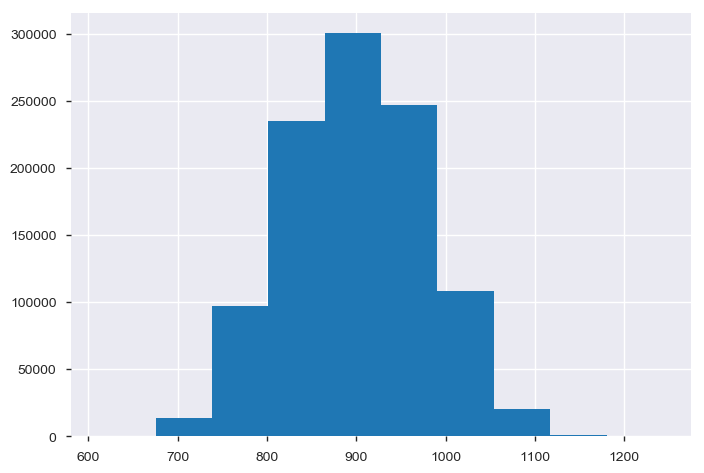

In [86]:
cleaned['premium'].hist()

In [26]:
Counter(cleaned['sales.channel'])

Counter({'Broker': 596563, 'Phone': 342419, 'Online': 86290})

In [27]:
Counter(cleaned['ni.gender'])

Counter({'F': 491735, 'M': 533537})

In [28]:
Counter(cleaned['ni.marital.status'])

Counter({0.0: 297337, 1.0: 727935})

In [29]:
Counter(cleaned['n.adults'])

Counter({2.0: 278127,
         5.0: 36809,
         1.0: 416317,
         4.0: 92408,
         3.0: 184715,
         6.0: 12312,
         7.0: 3413,
         8.0: 924,
         9.0: 204,
         11.0: 8,
         10.0: 33,
         12.0: 2})

In [30]:
Counter(cleaned['n.children'])

Counter({0.0: 424299,
         4.0: 54502,
         2.0: 133216,
         3.0: 80698,
         1.0: 211704,
         6.0: 24323,
         11.0: 5669,
         5.0: 38673,
         7.0: 17795,
         8.0: 12997,
         9.0: 9692,
         12.0: 4371,
         10.0: 7333})

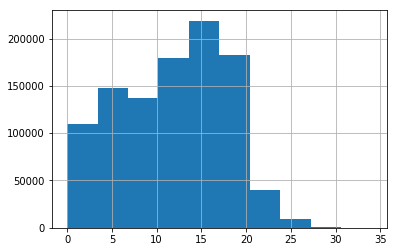

In [31]:
cleaned['tenure'].hist()

In [32]:
Counter(cleaned['claim.ind'])

Counter({0.0: 820568, 1.0: 204704})

# Display Cleaned Data

In [33]:
cleaned.shape[0]/train.shape[0]

0.9777765062108099

In [34]:
cleaned.head()

,cancel,year,zip.code,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind
0,0,2013,98004.0,blue,37.0,18.000000,high,C,Tenant,950.507336,Broker,F,0.0,2.0,0.0,15.0,0.0
1,0,2013,85017.0,white,40.0,17.000000,medium,A,Condo,909.346046,Broker,F,1.0,5.0,0.0,15.0,0.0
2,0,2013,80021.0,white,45.0,14.000000,high,A,House,897.084502,Phone,M,0.0,1.0,0.0,14.0,0.0
3,0,2013,85002.0,red,45.0,24.366136,high,A,House,979.039007,Phone,M,0.0,5.0,0.0,22.0,1.0
4,0,2013,50001.0,yellow,36.0,16.000000,high,C,House,932.379027,Broker,M,1.0,2.0,4.0,4.0,0.0


In [35]:
cleaned.dtypes

cancel                 int64
year                   int64
zip.code             float64
house.color           object
ni.age               float64
len.at.res           float64
credit                object
coverage.type         object
dwelling.type         object
premium              float64
sales.channel         object
ni.gender             object
ni.marital.status    float64
n.adults             float64
n.children           float64
tenure               float64
claim.ind            float64
dtype: object

In [106]:
###zipCode_to_state

In [107]:
from uszipcode import SearchEngine, SimpleZipcode, Zipcode
search=SearchEngine()

In [108]:
zipCode = cleaned['zip.code'].astype('int64')

In [109]:
def zipCode_to_state(number):
    return search.by_zipcode(number).state_abbr

In [125]:
import time
from datetime import datetime

start_time = datetime.now()

#
# do your work here
#
state = zipCode.apply(zipCode_to_state)


end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:25:14.889243


In [126]:
cleaned['state'] = state

In [128]:
cleaned.to_csv("cleaned.csv")

In [ ]:
#Another Methods (or package) for zipcode

In [87]:
#from pyzipcode import ZipCodeDatabase  # pyzipcode3 2.2, Last released: Apr 4, 2018
#zcdb = ZipCodeDatabase()

In [88]:
## experiment code
#zipCode = cleaned['zip.code'].astype('int64')
#zipCode.dtype

In [89]:
#def zipCode_to_state(number):
#    try:
#        return zcdb[number].state
#    except IndexError:
#        #pass
#        return None

In [90]:
#state = zipCode.apply(zipCode_to_state) # , axis=1  := additional argument
#Counter(state)

In [92]:
#import sys
#!{sys.executable} -m pip install pandas-profiling

In [91]:
#help("modules")
#help("modules profiling")

# XGBoost

In [22]:
# drop object
df = cleaned.drop(['house.color','credit','coverage.type','dwelling.type','sales.channel','ni.gender'], 1)

In [23]:
df.head()

,cancel,year,zip.code,ni.age,len.at.res,premium,ni.marital.status,n.adults,n.children,tenure,claim.ind
0,0,2013,98004.0,37.0,18.000000,950.507336,0.0,2.0,0.0,15.0,0.0
1,0,2013,85017.0,40.0,17.000000,909.346046,1.0,5.0,0.0,15.0,0.0
2,0,2013,80021.0,45.0,14.000000,897.084502,0.0,1.0,0.0,14.0,0.0
3,0,2013,85002.0,45.0,24.366136,979.039007,0.0,5.0,0.0,22.0,1.0
4,0,2013,50001.0,36.0,16.000000,932.379027,1.0,2.0,4.0,4.0,0.0


In [24]:
X, y = df.iloc[:,2:],df.iloc[:,:1]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [22]:
import xgboost as xgb

In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [27]:
data_train = xgb.DMatrix(X_train, y_train)  # 使用XGBoost的原生版本需要对数据进行转化
data_test = xgb.DMatrix(X_test, y_test)

In [ ]:
param = {'max_depth': 5, 'eta': 1, 'objective': 'binary:logistic'}
watchlist = [(data_test, 'test'), (data_train, 'train')]
n_round = 3
booster = xgb.train(param, data_train, num_boost_round=n_round, evals=watchlist)

In [0]:
# error rate
pred = booster.predict(data_test)
y = data_test.get_label()

In [56]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=1)
metrics.auc(fpr, tpr)

0.6317438226619856